# General imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Load the data
df = pd.read_csv('data.csv')

In [3]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
0,1,01 ONE FAMILY HOMES,1,S1,15 AVENUE D,10009.0,1.0,1.0,826.0,2240.0,1,S1,593362.0,40.720574,-73.978498,2010,4
1,1,02 TWO FAMILY HOMES,1,S2,91 AVENUE D,10009.0,2.0,1.0,994.0,3799.0,1,S2,1320000.0,40.723029,-73.976691,2010,2
2,1,03 THREE FAMILY HOMES,1,C0,326 EAST 4TH STREET,10009.0,3.0,0.0,2204.0,3921.0,1,C0,900000.0,40.721776,-73.979224,2010,12
3,1,04 TAX CLASS 1 CONDOS,1C,R6,238 EAST 4TH STREET,10009.0,1.0,0.0,0.0,0.0,1,R6,3027375.0,40.723353,-73.982947,2010,8
4,1,07 RENTALS - WALKUP APARTMENTS,2,C7,11 AVENUE D,10009.0,16.0,3.0,3419.0,14400.0,2,C7,8000000.0,40.720526,-73.978628,2010,2


In [4]:
# Convert values to numeric
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'], errors='coerce')
df['RESIDENTIAL UNITS'] = pd.to_numeric(df['RESIDENTIAL UNITS'], errors='coerce')
df['COMMERCIAL UNITS'] = pd.to_numeric(df['COMMERCIAL UNITS'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

# Label encoding to convert categorical values to numeric
label_encoder = preprocessing.LabelEncoder()
df['NEIGHBORHOOD'] = label_encoder.fit_transform(df['NEIGHBORHOOD'])

In [5]:
# Drop unnecessary columns
df2 = df.drop(['BUILDING CLASS CATEGORY',
               'TAX CLASS AT PRESENT', 
               'BUILDING CLASS AT PRESENT', 
               'TAX CLASS AT TIME OF SALE',
               'BUILDING CLASS AT TIME OF SALE',]
               , axis=1)

df2.shape

(311283, 12)

In [6]:
null_values = df2.isna()

pct_null = (null_values.mean() * 100).round(10)

print("Percentage of null values:")
print(pct_null)

Percentage of null values:
NEIGHBORHOOD         0.0
ADDRESS              0.0
ZIP CODE             0.0
RESIDENTIAL UNITS    0.0
COMMERCIAL UNITS     0.0
LAND SQUARE FEET     0.0
GROSS SQUARE FEET    0.0
SALE PRICE           0.0
LATITUDE             0.0
LONGITUDE            0.0
YEAR_SOLD            0.0
MONTH_SOLD           0.0
dtype: float64


In [7]:
print(df2.dtypes)


NEIGHBORHOOD           int64
ADDRESS               object
ZIP CODE             float64
RESIDENTIAL UNITS    float64
COMMERCIAL UNITS     float64
LAND SQUARE FEET     float64
GROSS SQUARE FEET    float64
SALE PRICE           float64
LATITUDE             float64
LONGITUDE            float64
YEAR_SOLD              int64
MONTH_SOLD             int64
dtype: object


In [8]:
# Contar o número de NaN por coluna
print(df2.isna().sum())

NEIGHBORHOOD         0
ADDRESS              0
ZIP CODE             0
RESIDENTIAL UNITS    0
COMMERCIAL UNITS     0
LAND SQUARE FEET     0
GROSS SQUARE FEET    0
SALE PRICE           0
LATITUDE             0
LONGITUDE            0
YEAR_SOLD            0
MONTH_SOLD           0
dtype: int64


In [9]:
df2.describe()

,NEIGHBORHOOD,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,LATITUDE,LONGITUDE,YEAR_SOLD,MONTH_SOLD
count,311283.000000,311283.000000,311283.000000,311283.000000,311283.000000,311283.000000,3.112830e+05,311283.000000,311283.000000,311283.000000,311283.000000
mean,45.548549,10029.359117,1.785372,0.347227,797.793224,6387.181835,2.282422e+06,40.672223,-73.367703,2010.510025,6.589380
std,20.993594,38.170134,13.351147,4.000125,3591.966286,27904.025884,9.621848e+06,2.561457,12.066826,4.952774,3.356937
min,0.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,-46.598362,-165.106380,2003.000000,1.000000
25%,24.000000,10014.000000,0.000000,0.000000,0.000000,0.000000,3.750000e+05,40.754993,-73.983179,2006.000000,4.000000
50%,49.000000,10021.000000,0.000000,0.000000,0.000000,0.000000,7.490000e+05,40.774166,-73.967596,2010.000000,7.000000
75%,63.000000,10026.000000,1.000000,0.000000,0.000000,0.000000,1.625000e+06,40.777048,-73.967596,2015.000000,9.000000
max,76.000000,10463.000000,764.000000,570.000000,149560.000000,420000.000000,3.000000e+08,64.843318,176.164822,2023.000000,12.000000


In [10]:
# Because we added latitude and longitude information with a Geocoding API, we filter evidently wrong coordinates
from shapely.geometry import Point, Polygon

def FilterManhattanCoordinates(df):
    # These coordinates form a polygon that approximates Manhattan's shape
    MANHATTAN_CORDS = [
        (40.698005, -74.016173),
        (40.704772, -74.021498),
        (40.756209, -74.012266),
        (40.878978, -73.929209),
        (40.875195, -73.918612),
        (40.872910, -73.909668),
        (40.863531, -73.914005),
        (40.846438, -73.927714),
        (40.834556, -73.934069),
        (40.808835, -73.933640),
        (40.800519, -73.927370),
        (40.792851, -73.929260),
        (40.781284, -73.940080),
        (40.775369, -73.940080),
        (40.741822, -73.970742),
        (40.728637, -73.964892),
        (40.710145, -73.975104),
        (40.705981, -73.997177),
        (40.699799, -74.004993),
        (40.698005, -74.016173)  # Back to start
    ]

    MANHATTAN_POLY = Polygon(MANHATTAN_CORDS)

    # Create a mask for points within Manhattan
    def IsInManhattan(row):
        point = Point(row['LATITUDE'], row['LONGITUDE'])
        return MANHATTAN_POLY.contains(point)

    # Apply the filter
    manhattan_mask = df.apply(IsInManhattan, axis=1)
    manhattan_df = df[manhattan_mask].copy()

    return manhattan_df

# Filter coordinates outside Manhattan
df3 = FilterManhattanCoordinates(df2)

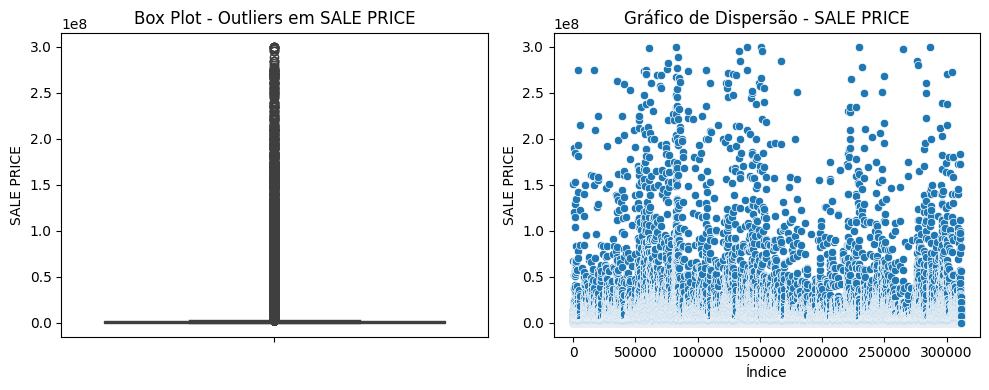

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Box plot
sns.boxplot(y=df3["SALE PRICE"], ax=ax1)
ax1.set_title("Box Plot - Outliers em SALE PRICE")
ax1.set_ylabel("SALE PRICE")

# Scatter plot
sns.scatterplot(x=df3.index, y=df3["SALE PRICE"], ax=ax2)
ax2.set_title("Gráfico de Dispersão - SALE PRICE")
ax2.set_xlabel("Índice")
ax2.set_ylabel("SALE PRICE")

plt.tight_layout()
plt.show()

In [12]:
df3.shape

(304861, 12)

In [13]:
free_properties = df3[df3['SALE PRICE'] <= 10000]
free_properties.shape

(7297, 12)

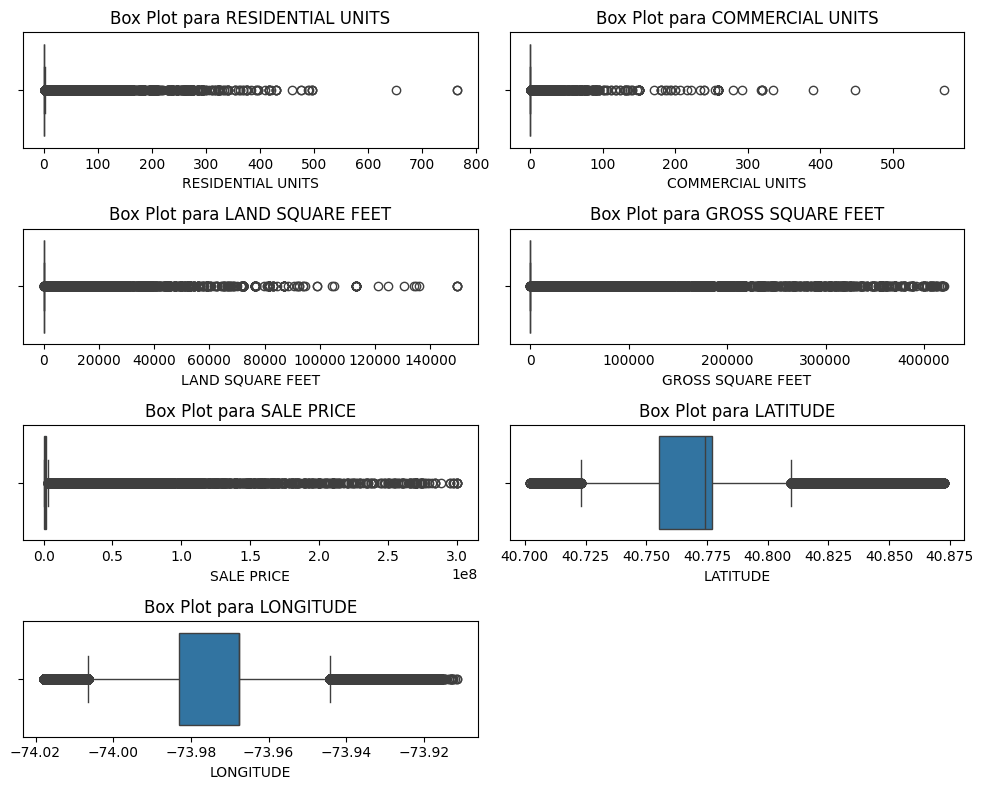

In [14]:
# Selecionar apenas as colunas numéricas
numeric_df = df3.select_dtypes(include=['number'])

numeric_df = numeric_df.drop(columns=['ZIP CODE', 'NEIGHBORHOOD', 'MONTH_SOLD', 'YEAR_SOLD'])

# Definir o número de subplots
num_cols = len(numeric_df.columns)
num_rows = (num_cols + 1) // 2  # Two plots per row
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, 2*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Criar um box plot para cada coluna numérica
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot para {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
# Remove outliers
df4 = df3.drop(df[df["LAND SQUARE FEET"] > 120_000].index)
df4 = df3.drop(df[df["COMMERCIAL UNITS"] > 400].index)
df4 = df3.drop(df[df["RESIDENTIAL UNITS"] > 600].index)

In [16]:
# Check for values equal to 0
for col in df4.columns:
    print(f"Valores igual a 0: {col} = {df4[df4[col] == 0].shape[0]}")

Valores igual a 0: NEIGHBORHOOD = 434
Valores igual a 0: ADDRESS = 0
Valores igual a 0: ZIP CODE = 0
Valores igual a 0: RESIDENTIAL UNITS = 172718
Valores igual a 0: COMMERCIAL UNITS = 260287
Valores igual a 0: LAND SQUARE FEET = 266159
Valores igual a 0: GROSS SQUARE FEET = 263998
Valores igual a 0: SALE PRICE = 0
Valores igual a 0: LATITUDE = 0
Valores igual a 0: LONGITUDE = 0
Valores igual a 0: YEAR_SOLD = 0
Valores igual a 0: MONTH_SOLD = 0


In [17]:
# Supondo que o seu DataFrame se chame df
# e que as colunas se chamem exatamente 'LAND SQUARE FEET' e 'GROSS SQUARE FEET'
linhas_zeros = df4[(df4['LAND SQUARE FEET'] == 0) & (df4['GROSS SQUARE FEET'] == 0)].shape[0]

print("Número de linhas onde ambos LAND SQUARE FEET e GROSS SQUARE FEET são 0:", linhas_zeros)


Número de linhas onde ambos LAND SQUARE FEET e GROSS SQUARE FEET são 0: 262754


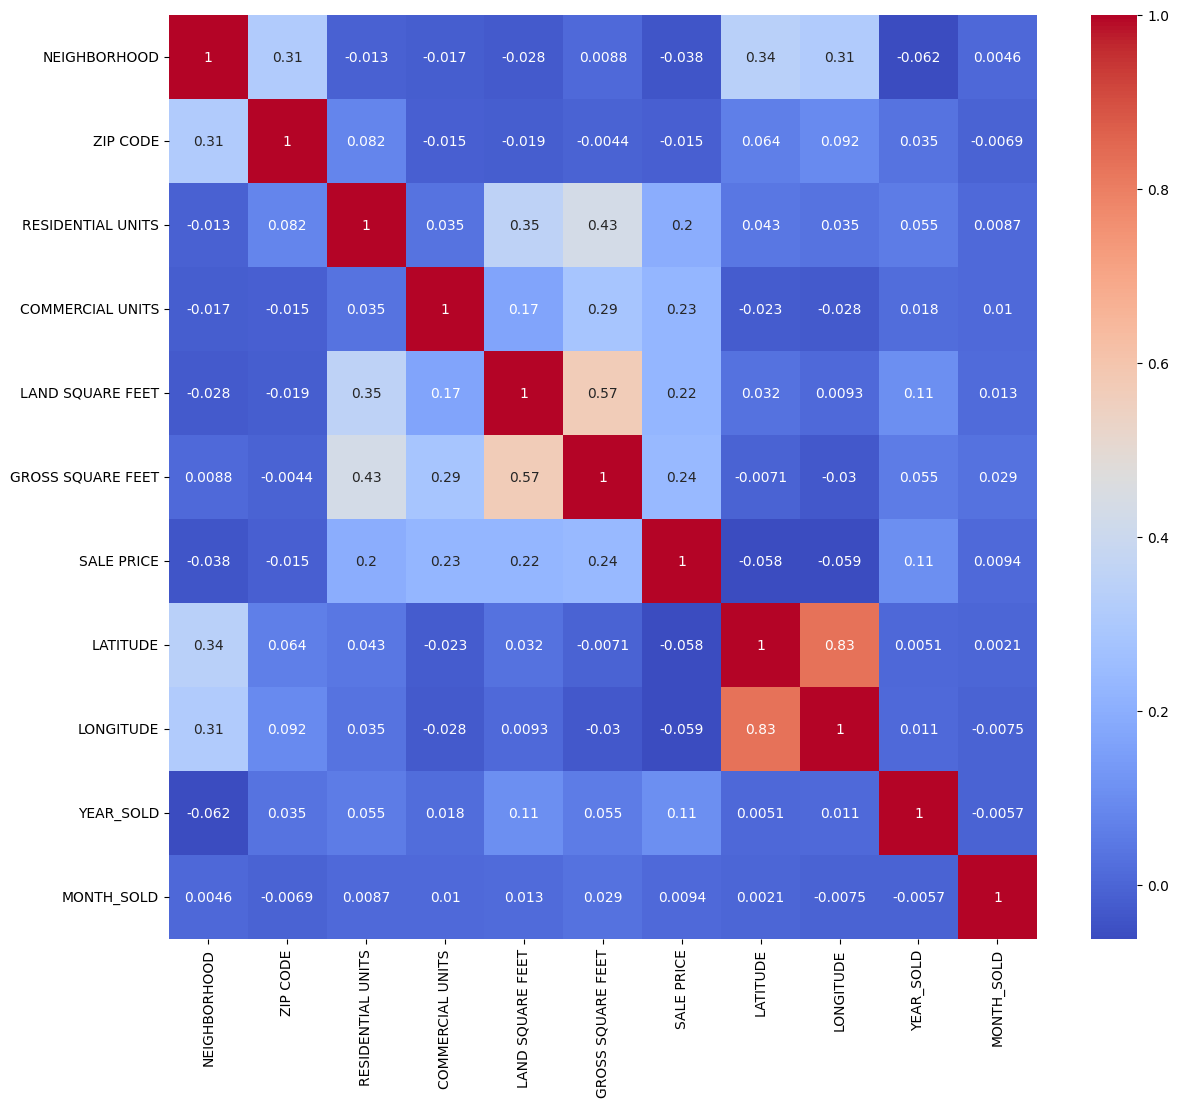

In [18]:
# Calcular a correlação e criar o heatmap
numeric_df = df4.select_dtypes(include=['number'])

plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [19]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 304858 entries, 0 to 311282
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NEIGHBORHOOD       304858 non-null  int64  
 1   ADDRESS            304858 non-null  object 
 2   ZIP CODE           304858 non-null  float64
 3   RESIDENTIAL UNITS  304858 non-null  float64
 4   COMMERCIAL UNITS   304858 non-null  float64
 5   LAND SQUARE FEET   304858 non-null  float64
 6   GROSS SQUARE FEET  304858 non-null  float64
 7   SALE PRICE         304858 non-null  float64
 8   LATITUDE           304858 non-null  float64
 9   LONGITUDE          304858 non-null  float64
 10  YEAR_SOLD          304858 non-null  int64  
 11  MONTH_SOLD         304858 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 30.2+ MB


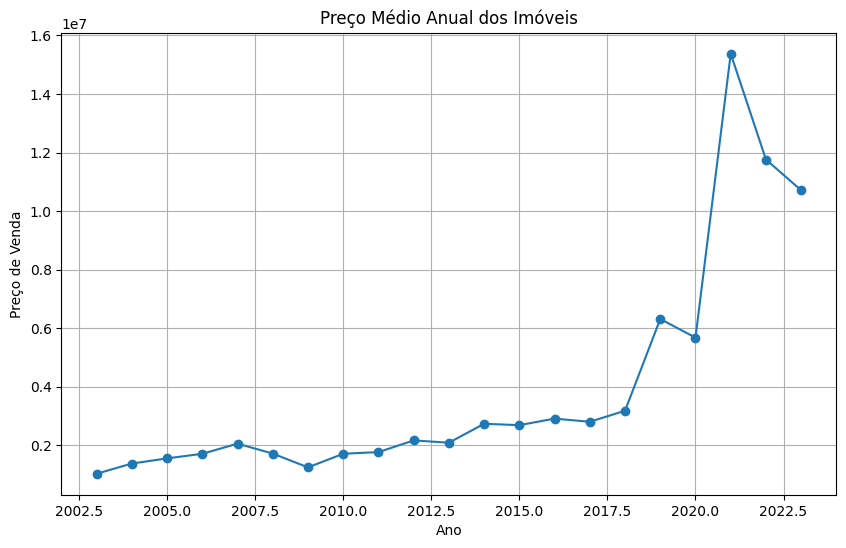

In [20]:
# Group by year and calculate the average sale price
df_ano = df4.groupby(df["YEAR_SOLD"])["SALE PRICE"].mean().reset_index()

# Cria o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_ano["YEAR_SOLD"], df_ano["SALE PRICE"], marker='o', linestyle='-')
plt.title("Preço Médio Anual dos Imóveis")
plt.xlabel("Ano")
plt.ylabel("Preço de Venda")
plt.grid(True)
plt.show()

In [21]:
import plotly.express as px
import numpy as np

# First group the data to count sales at each coordinate
location_counts = df4.groupby(['LATITUDE', 'LONGITUDE']).agg({
    'ADDRESS': 'first',  # Keep one address for hover info
    'SALE PRICE': 'count',  # Count number of sales
}).reset_index()

# Rename the count column for clarity
location_counts = location_counts.rename(columns={'SALE PRICE': 'Number of Sales'})

# Calculate color scale range using percentiles to handle outliers
max_color = np.percentile(location_counts['Number of Sales'], 90)  # 95th percentile
color_range = [0, max_color]

# Create the interactive map
fig = px.scatter_map(
    location_counts,
    lat="LATITUDE",
    lon="LONGITUDE",
    hover_name="ADDRESS",
    hover_data=["Number of Sales"],
    color="Number of Sales",
    color_continuous_scale="inferno_r",
    range_color=color_range,  # Set the color scale range
    size="Number of Sales",
    size_max=15,
    zoom=10,
    height=600
)

# Adjust the marker settings
fig.update_traces(
    marker=dict(
        sizemin=3,
        sizeref=3,
        sizemode='area',
        sizesrc='Number of Sales'
    )
)

# Update colorbar to show full range including outliers
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        uirevision=True
    ),
    margin={"r":0, "t":0, "l":0, "b":0},
    title="Map of Sales Frequency",
    coloraxis_colorbar=dict(
        title="Number of Sales",
        ticktext=[f">{max_color:.0f}"],
        tickvals=[max_color],
        tickmode="array",
        lenmode="pixels",
        len=200
    )
)

# Show the plot
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Select features
X = df4.drop(columns=['SALE PRICE', 'ADDRESS'])
y = df4['SALE PRICE']

def enhance_features(X):
    X_new = X.copy()
    
    # Log transform area features
    X_new['LOG_GROSS_SQFT'] = np.log1p(X_new['GROSS SQUARE FEET'])
    X_new['LOG_LAND_SQFT'] = np.log1p(X_new['LAND SQUARE FEET'])
    
    # Unit features
    X_new['TOTAL_UNITS'] = X_new['RESIDENTIAL UNITS'] + X_new['COMMERCIAL UNITS']
    X_new['LOG_TOTAL_UNITS'] = np.log1p(X_new['TOTAL_UNITS'])
    
    # Density metrics
    X_new['UNITS_PER_SQFT'] = X_new['TOTAL_UNITS'] / (X_new['GROSS SQUARE FEET'] + 1)
    X_new['LAND_TO_GROSS_RATIO'] = X_new['LAND SQUARE FEET'] / (X_new['GROSS SQUARE FEET'] + 1)
    
    # Location features
    X_new['DISTANCE_TO_CENTER'] = np.sqrt(
        (X_new['LATITUDE'] - X_new['LATITUDE'].mean())**2 + 
        (X_new['LONGITUDE'] - X_new['LONGITUDE'].mean())**2
    )
    
    # Time features
    X_new['SEASON'] = np.sin(2 * np.pi * X_new['MONTH_SOLD'] / 12)
    
    # Commercial density
    X_new['COMMERCIAL_RATIO'] = X_new['COMMERCIAL UNITS'] / (X_new['TOTAL_UNITS'] + 1)
    
    return X_new

def remove_outliers(df, target, columns, n_std=3):
    df_clean = df.copy()
    y_clean = target.copy()
    
    # Remove price outliers first
    price_mean = y_clean.mean()
    price_std = y_clean.std()
    price_mask = abs(y_clean - price_mean) <= (n_std * price_std)
    df_clean = df_clean[price_mask]
    y_clean = y_clean[price_mask]
    
    # Remove feature outliers
    for col in columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        mask = abs(df_clean[col] - mean) <= (n_std * std)
        df_clean = df_clean[mask]
        y_clean = y_clean[mask]
    
    return df_clean, y_clean

# Prepare features
X_engineered = enhance_features(X)

# Define columns for outlier removal
outlier_columns = ['GROSS SQUARE FEET', 'LAND SQUARE FEET', 'TOTAL_UNITS', 
                  'UNITS_PER_SQFT', 'LAND_TO_GROSS_RATIO']

# Remove outliers
X_clean, y_clean = remove_outliers(X_engineered, y, outlier_columns)

# Scale features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_clean)
X_scaled = pd.DataFrame(X_scaled, columns=X_clean.columns)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=500,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'CatBoost': CatBoostRegressor(
        iterations=500,
        depth=7,
        learning_rate=0.05,
        subsample=0.8,
        random_state=42,
        verbose=False
    ),
    'Extra Trees': ExtraTreesRegressor(
        n_estimators=500,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    )
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y_clean, cv=5, scoring='r2')
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2,
        'MAE': mae,
        'CV_mean': cv_scores.mean(),
        'CV_std': cv_scores.std()
    }

# Print results
print("\nModel Comparison:")
print("-" * 80)
print(f"{'Model':<15} {'RMSE':>15} {'R2':>10} {'MAE':>15} {'CV Mean':>10} {'CV Std':>10}")
print("-" * 80)

for name, metrics in results.items():
    print(f"{name:<15} ${metrics['RMSE']:>14,.2f} {metrics['R2']:>10.4f} ${metrics['MAE']:>14,.2f} {metrics['CV_mean']:>10.4f} {metrics['CV_std']:>10.4f}")

# Get best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_clean.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 15 Most Important Features ({best_model_name}):")
    print(feature_importance.head(15))
print(f"\nTop 15 Most Important Features ({best_model_name}):")
print(feature_importance.head(15))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'].head(15), feature_importance['importance'].head(15))
plt.xlabel('Feature Importance')
plt.title(f'Top 15 Most Important Features ({best_model_name})')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


Training Random Forest...
